<a href="https://colab.research.google.com/github/jrctechmind/ia/blob/main/Redes_Neurais_ex_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2952 - accuracy: 0.9152
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1403 - accuracy: 0.9588
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1059 - accuracy: 0.9681
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0874 - accuracy: 0.9737
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0739 - accuracy: 0.9769
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0659 - accuracy: 0.9793
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0577 - accuracy: 0.9817
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0524 - accuracy: 0.9829
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0490 - accuracy: 0.9841
Epoch 10/50
187

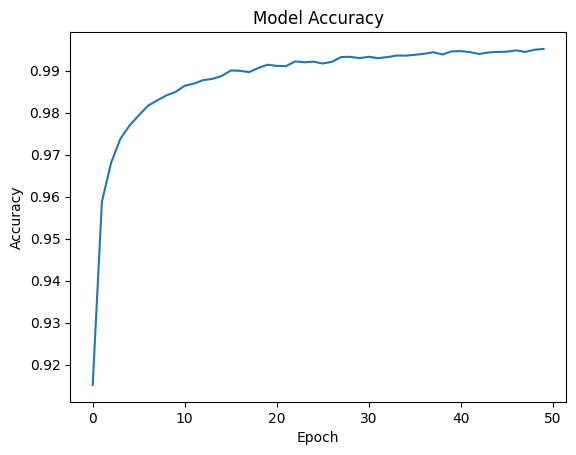

313/313 - 1s - loss: 0.1177 - accuracy: 0.9803 - 692ms/epoch - 2ms/step
Test Accuracy: 0.9803000092506409
313/313 [==============================] - 1s 2ms/step


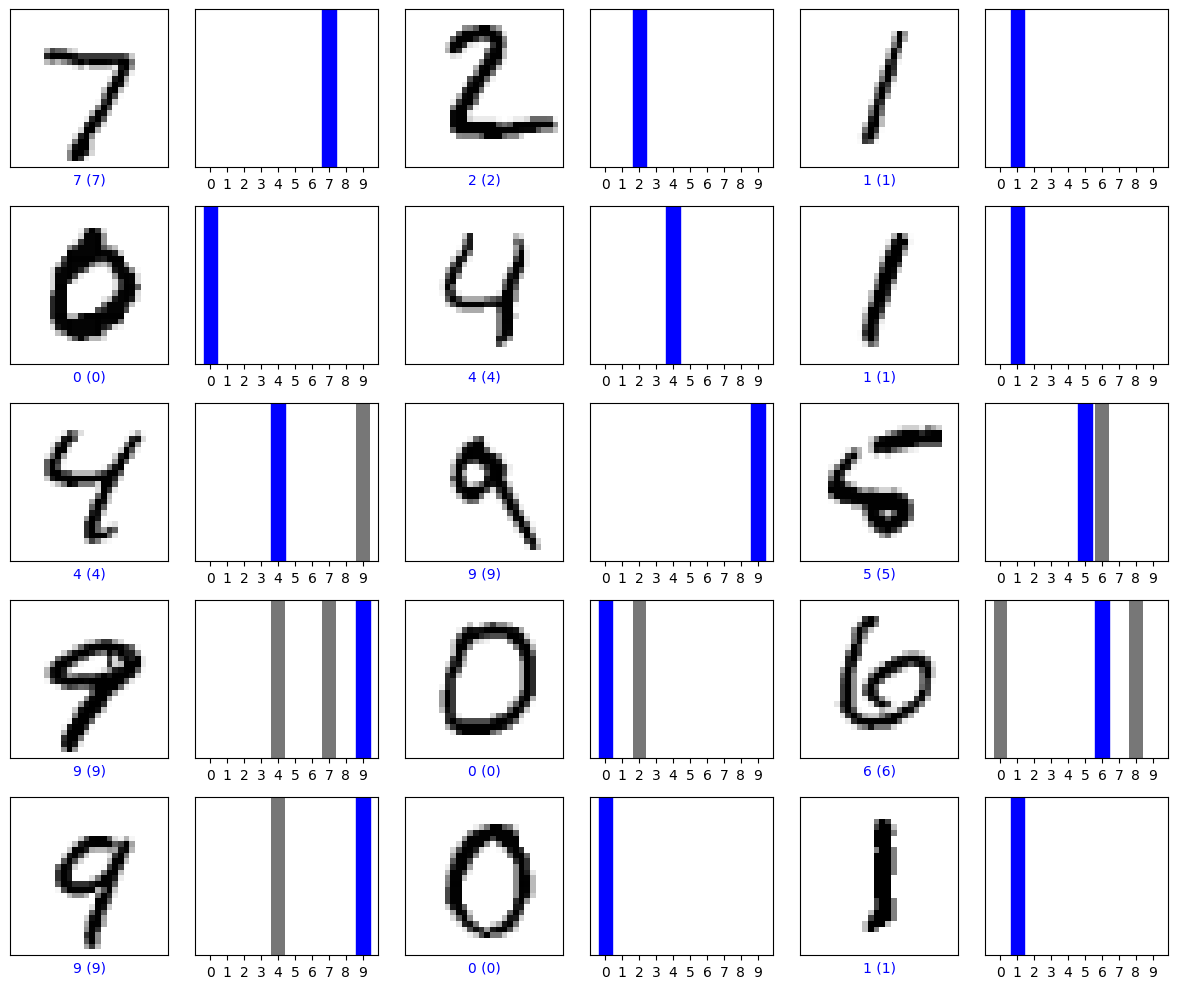

In [1]:
# Importar as bibliotecas necessárias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar as imagens (escala de 0 a 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir o modelo da rede neural
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Função de callback para exibir o progresso do treinamento
class PrintProgress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {logs["loss"]:.4f}, Accuracy: {logs["accuracy"]:.4f}')

# Treinar o modelo
num_epochs = 50
history = model.fit(train_images, train_labels, epochs=num_epochs, callbacks=[PrintProgress()])

# Exibir gráfico da precisão (accuracy) durante o treinamento
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Avaliar o modelo com dados de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

# Função para exibir uma imagem e sua previsão
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'{predicted_label} ({true_label})', color=color)

# Função para exibir um gráfico de barras das previsões da rede neural
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Fazer previsões com o modelo treinado
predictions = model.predict(test_images)

# Exibir algumas imagens de teste com suas previsões
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


Carregando o conjunto de dados MNIST...
Normalizando as imagens...
Definindo o modelo da rede neural...
Compilando o modelo...
Iniciando o treinamento da rede neural...
Epoch 1/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2921 - accuracy: 0.9149
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1428 - accuracy: 0.9573
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1065 - accuracy: 0.9682
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0877 - accuracy: 0.9729
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0743 - accuracy: 0.9765
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0654 - accuracy: 0.9793
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0577 - accuracy: 0.9809
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0524 - accuracy: 0.9826
Epoch 9/50
187

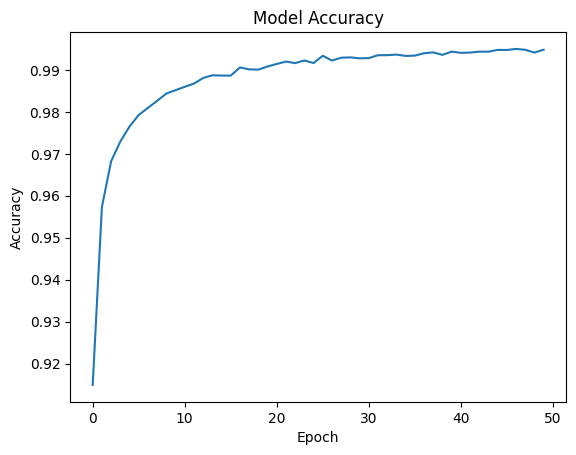

Avaliando o modelo com dados de teste...
313/313 - 1s - loss: 0.1064 - accuracy: 0.9813 - 804ms/epoch - 3ms/step
Test Accuracy: 0.9812999963760376
Fazendo previsões com o modelo treinado...
313/313 [==============================] - 1s 3ms/step
Exibindo algumas imagens de teste com previsões correspondentes...


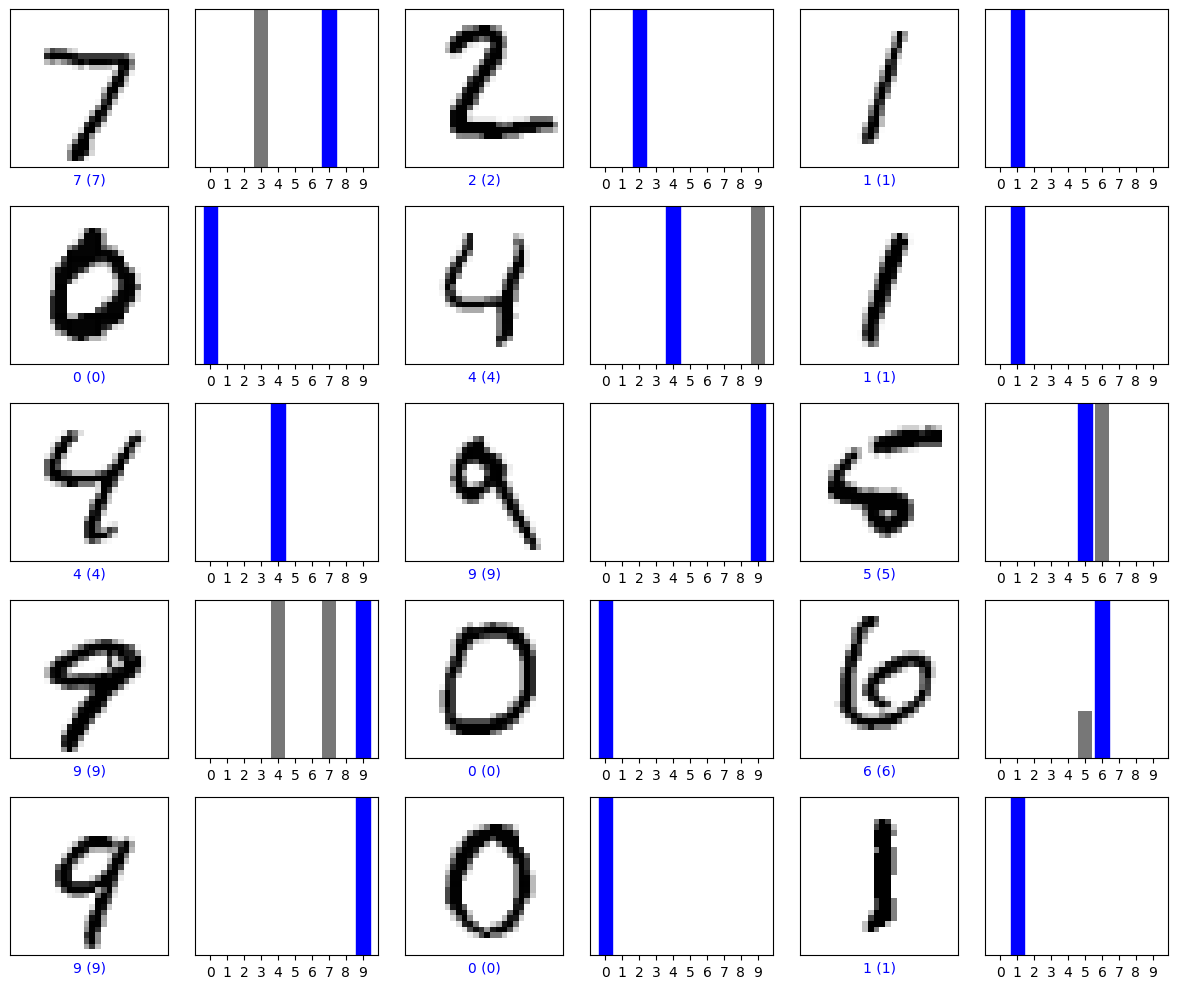

In [2]:
# Importar as bibliotecas necessárias
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados MNIST
print("Carregando o conjunto de dados MNIST...")
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalizar as imagens (escala de 0 a 1)
print("Normalizando as imagens...")
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definir o modelo da rede neural
print("Definindo o modelo da rede neural...")
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# Compilar o modelo
print("Compilando o modelo...")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Função de callback para exibir o progresso do treinamento
class PrintProgress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {logs["loss"]:.4f}, Accuracy: {logs["accuracy"]:.4f}')

# Treinar o modelo
print("Iniciando o treinamento da rede neural...")
num_epochs = 50
history = model.fit(train_images, train_labels, epochs=num_epochs, callbacks=[PrintProgress()])

# Exibir gráfico da precisão (accuracy) durante o treinamento
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Avaliar o modelo com dados de teste
print("Avaliando o modelo com dados de teste...")
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

# Função para exibir uma imagem e sua previsão
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f'{predicted_label} ({true_label})', color=color)

# Função para exibir um gráfico de barras das previsões da rede neural
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Fazer previsões com o modelo treinado
print("Fazendo previsões com o modelo treinado...")
predictions = model.predict(test_images)

# Exibir algumas imagens de teste com suas previsões
print("Exibindo algumas imagens de teste com previsões correspondentes...")
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
